<a href="https://colab.research.google.com/github/HusamAlzain/ML_Portfolio/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Improt Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


No missing values, we can proceed to EDA part

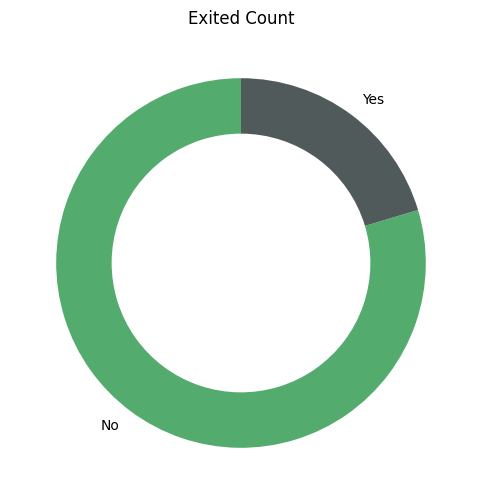

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(df['Exited'].value_counts(),
       labels=['No', 'Yes'],
       wedgeprops={'width':0.3},
       startangle=90,
       colors=['#53ac6e', '#515A5A'])
plt.title('Exited Count')
plt.show()

We can see clearly that the dataset is imbalanced

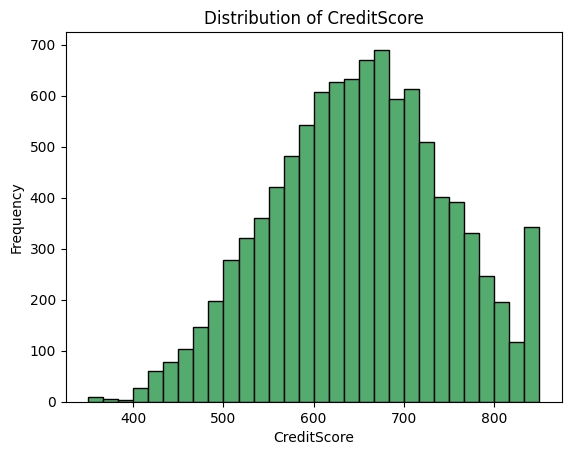

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['CreditScore'], bins=30, edgecolor='black', color='#53ac6e')
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()


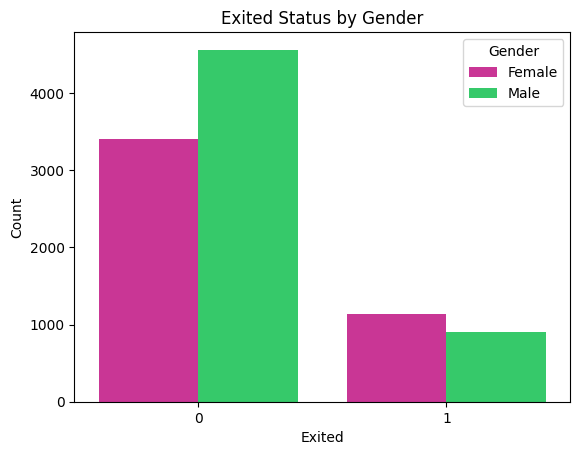

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette dictionary for 'Male' and 'Female'
colors = {'Male': '#E11E9C', 'Female': '#1EE163'}

# Set a custom color palette
sns.set_palette(sns.color_palette([colors['Male'], colors['Female']]))

# Create the countplot
sns.countplot(x='Exited', hue='Gender', data=df)

# Restyle the legend to show your custom colors
legend = plt.legend(title='Gender')
legend.get_title().set_color("black")  # Change legend title color

plt.title('Exited Status by Gender')
plt.xlabel('Exited')
plt.ylabel('Count')

plt.show()


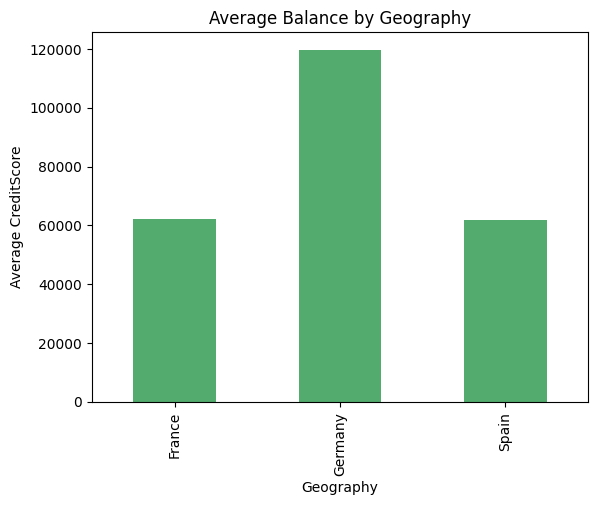

In [ ]:
df.groupby('Geography')['Balance'].mean().plot(kind='bar', color=['#53ac6e'])
plt.title('Average Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Average CreditScore')
plt.show()


<Axes: xlabel='Exited'>

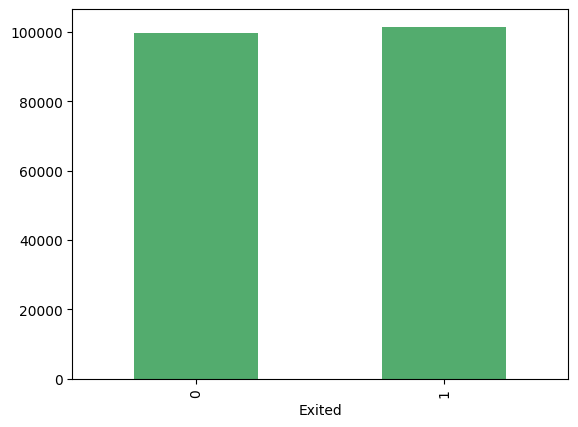

In [ ]:
# Plotting Exited vs Estimated Salary

df.groupby('Exited')['EstimatedSalary'].mean().plot(kind='bar', color=['#53ac6e'])

<ipython-input-16-7dcb44543bfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth =2 , cmap="Greens")


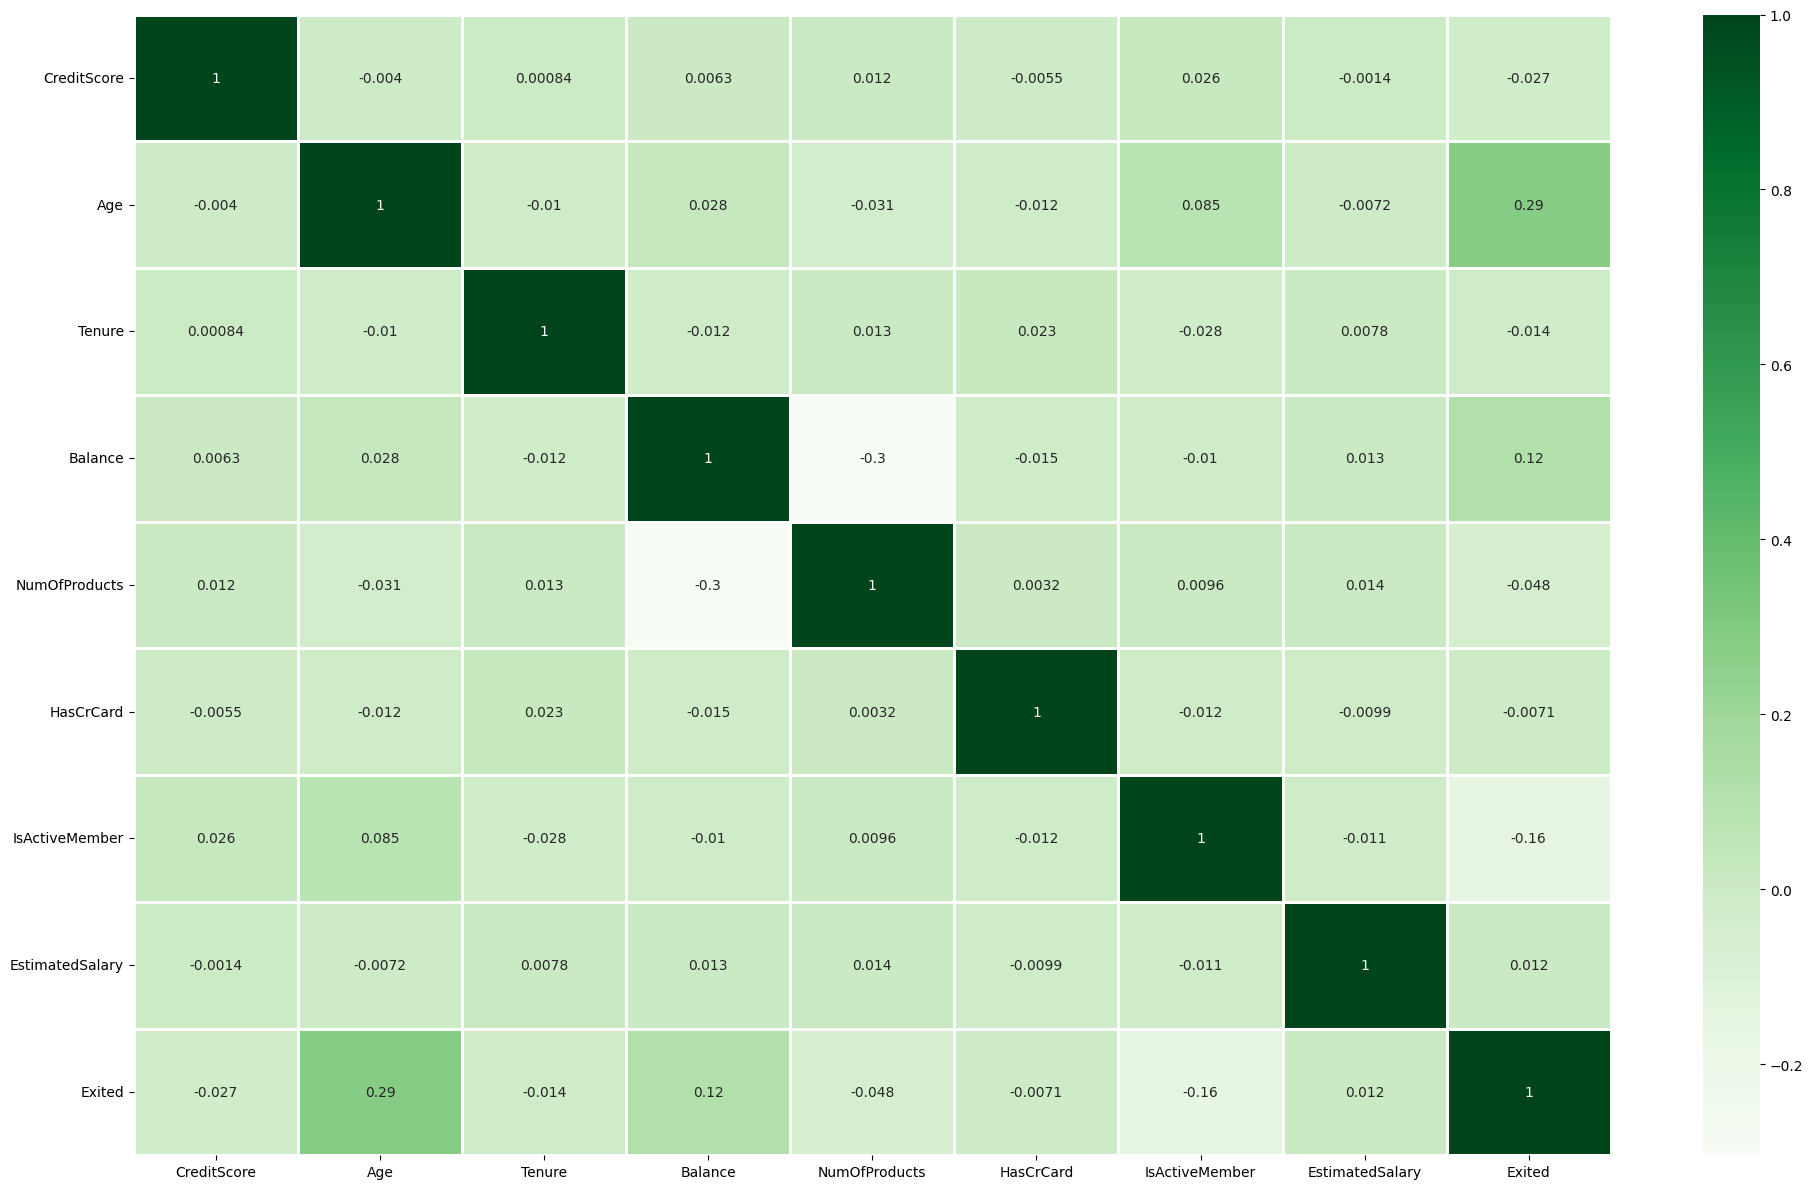

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidth =2 , cmap="Greens")
plt.tight_layout()

# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
# Split data into X and y
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
from sklearn.utils import validation
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [ ]:
cat_onehot = df[['Geography', 'Gender']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Select the categorical columns
categorical_cols = ['Geography', 'Gender']

# Create a ColumnTransformer with one-hot encoding for categorical columns
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_cols),
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Fit and transform your data
X_train = column_trans.fit_transform(X_train)  # Replace X with your input data
X_test = column_trans.transform(X_test)
# X_encoded will contain the one-hot encoded features


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.0494720e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.3303196e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.5649539e+05],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.2580630e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.1875260e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.2974011e+05]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.45245891],
       [0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.66516542],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.78249378],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.62903367],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5937618 ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.6487046 ]])

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (9000, 13)
X_test shape:  (1000, 13)
y_train shape:  (9000,)
y_test shape:  (1000,)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(12, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=100,
    verbose=1,

)

Epoch 1/100
254/254 [==============================] - 4s 6ms/step - loss: 0.4796 - recall: 0.0270 - precision: 0.5696 - val_loss: 0.4365 - val_recall: 0.2096 - val_precision: 0.6250
Epoch 2/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4466 - recall: 0.1681 - precision: 0.6349 - val_loss: 0.4118 - val_recall: 0.1497 - val_precision: 0.8621
Epoch 3/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4239 - recall: 0.2551 - precision: 0.6641 - val_loss: 0.3997 - val_recall: 0.4311 - val_precision: 0.6207
Epoch 4/100
254/254 [==============================] - 1s 3ms/step - loss: 0.3909 - recall: 0.3499 - precision: 0.6899 - val_loss: 0.3516 - val_recall: 0.3353 - val_precision: 0.8358
Epoch 5/100
254/254 [==============================] - 1s 3ms/step - loss: 0.3655 - recall: 0.4058 - precision: 0.7230 - val_loss: 0.3507 - val_recall: 0.4731 - val_precision: 0.7524
Epoch 6/100
254/254 [==============================] - 1s 3ms/step - loss: 0.3580 - r

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 118)               1534      
                                                                 
 dense_2 (Dense)             (None, 118)               14042     
                                                                 
 dense_3 (Dense)             (None, 118)               14042     
                                                                 
 dense_4 (Dense)             (None, 1)                 119       
                                                                 
Total params: 29905 (116.82 KB)
Trainable params: 29905 (116.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,precision,val_loss,val_recall,val_precision
0,0.479595,0.027011,0.569620,0.436456,0.209581,0.625000
1,0.446613,0.168067,0.634921,0.411753,0.149701,0.862069
2,0.423856,0.255102,0.664062,0.399671,0.431138,0.620690
3,0.390858,0.349940,0.689941,0.351601,0.335329,0.835821
4,0.365493,0.405762,0.722995,0.350697,0.473054,0.752381


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[739  57]
 [110  94]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       796
           1       0.62      0.46      0.53       204

    accuracy                           0.83      1000
   macro avg       0.75      0.69      0.71      1000
weighted avg       0.82      0.83      0.82      1000



32/32 [==============================] - 0s 2ms/step


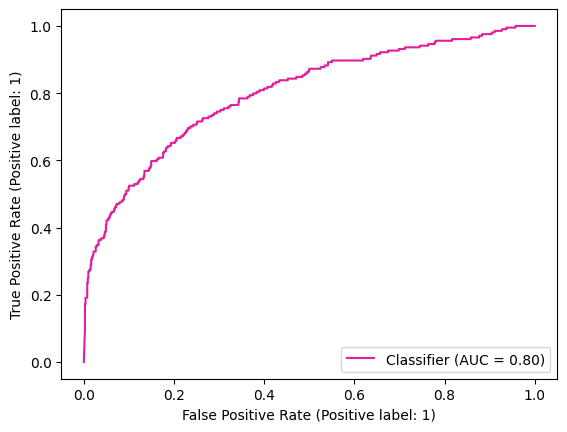

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

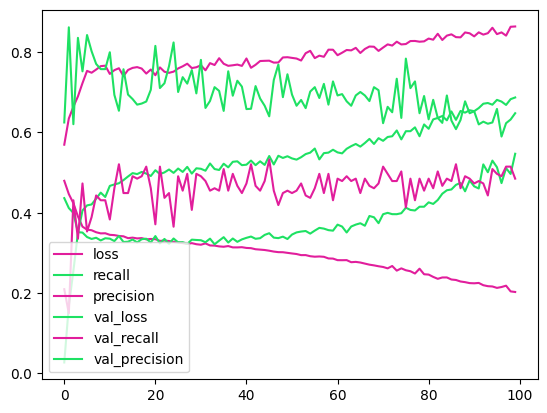

In [ ]:
loss_df.plot()
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 12) dtype=float32, numpy=
 array([[ 0.491474  , -0.27194777, -0.1347628 , -0.15390988, -0.04658765,
         -0.00646349, -0.06728102, -0.08078283, -0.15535325, -0.19507906,
          0.25539336, -0.24208316],
        [ 0.36404154, -0.42314973,  0.39799038,  0.20664233,  0.17109172,
         -0.47695374,  0.17733604, -0.32144454,  0.08162365, -0.51751405,
          0.24041656,  0.13595627],
        [-0.25205478,  0.33679095, -0.21560998,  0.18736723,  0.08497331,
         -0.05876248,  0.01274919,  0.53144497,  0.30018595,  0.39793384,
          0.10989803,  0.03460825],
        [ 0.1835789 ,  0.44059524,  0.37477162,  0.430761  , -0.07045189,
         -0.06711639, -0.04079305,  0.2875355 , -0.26919952, -0.01419813,
          0.03698279,  0.17595677],
        [ 0.22024488, -0.44726792,  0.30078724,  0.16001524,  0.27437562,
          0.19011708,  0.03790491,  0.45573893, -0.27993786,  0.14747202,
         -0.187352  , -0.40733445],
        [-0.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights based on your training data
weight = compute_class_weight('balanced', classes=np. unique (y_train), y=y_train)
weights_dict = {i:w for i,w in enumerate (weight)}

In [ ]:
weights_dict

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(12, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=120,
    verbose=1,
    class_weight={0: 0.6278777731268314, 1: 2.454991816693944}

)

Epoch 1/120
254/254 [==============================] - 6s 8ms/step - loss: 0.6439 - recall: 0.6537 - val_loss: 0.6749 - val_recall: 0.7126
Epoch 2/120
254/254 [==============================] - 2s 8ms/step - loss: 0.5775 - recall: 0.7089 - val_loss: 0.6386 - val_recall: 0.8084
Epoch 3/120
254/254 [==============================] - 2s 8ms/step - loss: 0.5407 - recall: 0.7251 - val_loss: 0.5460 - val_recall: 0.8024
Epoch 4/120
254/254 [==============================] - 1s 5ms/step - loss: 0.5160 - recall: 0.7287 - val_loss: 0.4869 - val_recall: 0.7665
Epoch 5/120
254/254 [==============================] - 1s 3ms/step - loss: 0.4952 - recall: 0.7209 - val_loss: 0.4100 - val_recall: 0.6108
Epoch 6/120
254/254 [==============================] - 1s 3ms/step - loss: 0.4911 - recall: 0.7257 - val_loss: 0.4859 - val_recall: 0.7545
Epoch 7/120
254/254 [==============================] - 1s 3ms/step - loss: 0.4863 - recall: 0.7209 - val_loss: 0.4723 - val_recall: 0.7186
Epoch 8/120
254/254 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 12)                168       
                                                                 
 dense_68 (Dense)            (None, 118)               1534      
                                                                 
 dense_69 (Dense)            (None, 118)               14042     
                                                                 
 dense_70 (Dense)            (None, 118)               14042     
                                                                 
 dense_71 (Dense)            (None, 1)                 119       
                                                                 
Total params: 29905 (116.82 KB)
Trainable params: 29905 (116.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.643923,0.653661,0.674927,0.712575
1,0.577461,0.708884,0.638586,0.808383
2,0.540737,0.725090,0.546043,0.802395
3,0.515983,0.728691,0.486896,0.766467
4,0.495233,0.720888,0.409970,0.610778


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[645 151]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.50      0.73      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.83      0.79      0.81      1000



32/32 [==============================] - 0s 2ms/step


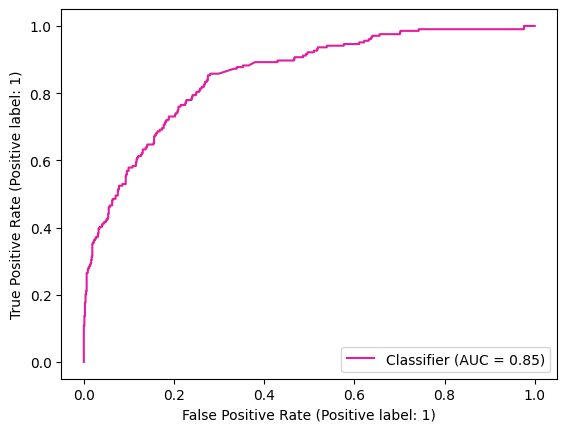

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

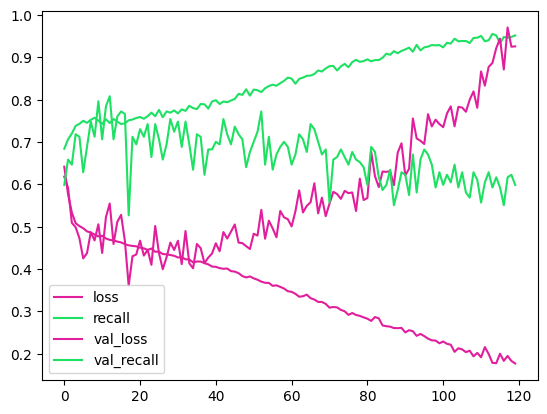

In [ ]:
loss_df.plot()
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(12, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=44,
    epochs=200,
    verbose=1,

)

Epoch 1/200
185/185 [==============================] - 3s 7ms/step - loss: 0.4727 - recall: 0.0924 - precision: 0.5662 - val_loss: 0.4153 - val_recall: 0.0299 - val_precision: 1.0000
Epoch 2/200
185/185 [==============================] - 1s 5ms/step - loss: 0.4103 - recall: 0.3043 - precision: 0.6654 - val_loss: 0.4080 - val_recall: 0.2036 - val_precision: 0.8500
Epoch 3/200
185/185 [==============================] - 1s 4ms/step - loss: 0.3774 - recall: 0.3788 - precision: 0.7612 - val_loss: 0.3473 - val_recall: 0.4910 - val_precision: 0.6667
Epoch 4/200
185/185 [==============================] - 1s 3ms/step - loss: 0.3664 - recall: 0.4016 - precision: 0.7433 - val_loss: 0.3400 - val_recall: 0.3832 - val_precision: 0.8421
Epoch 5/200
185/185 [==============================] - 1s 3ms/step - loss: 0.3606 - recall: 0.4424 - precision: 0.7225 - val_loss: 0.3373 - val_recall: 0.3772 - val_precision: 0.8750
Epoch 6/200
185/185 [==============================] - 1s 3ms/step - loss: 0.3605 - r

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 12)                168       
                                                                 
 dense_73 (Dense)            (None, 118)               1534      
                                                                 
 dense_74 (Dense)            (None, 118)               14042     
                                                                 
 dense_75 (Dense)            (None, 118)               14042     
                                                                 
 dense_76 (Dense)            (None, 1)                 119       
                                                                 
Total params: 29905 (116.82 KB)
Trainable params: 29905 (116.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,precision,val_loss,val_recall,val_precision
0,0.472700,0.092437,0.566176,0.415336,0.029940,1.000000
1,0.410278,0.304322,0.665354,0.407981,0.203593,0.850000
2,0.377401,0.378751,0.761158,0.347283,0.491018,0.666667
3,0.366421,0.401561,0.743333,0.340050,0.383234,0.842105
4,0.360617,0.442377,0.722549,0.337269,0.377246,0.875000


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[760  36]
 [123  81]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       796
           1       0.69      0.40      0.50       204

    accuracy                           0.84      1000
   macro avg       0.78      0.68      0.70      1000
weighted avg       0.83      0.84      0.82      1000



32/32 [==============================] - 0s 2ms/step


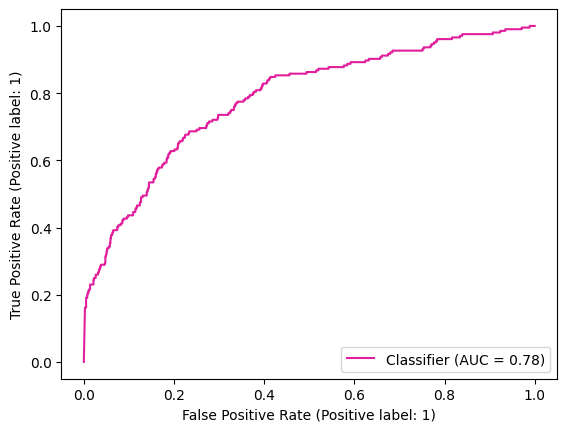

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

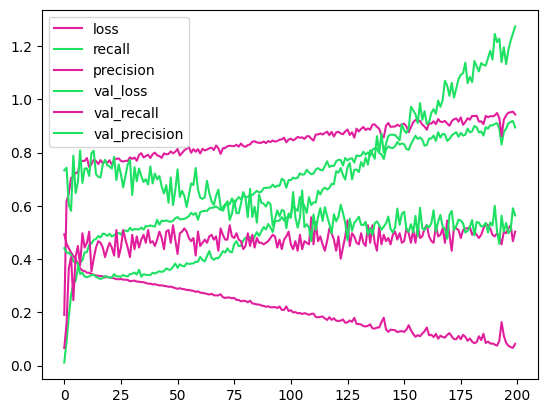

In [ ]:
loss_df.plot()
plt.show()

### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(12, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=44,
    epochs=200,
    verbose=1,

)

Epoch 1/200
185/185 [==============================] - 2s 5ms/step - loss: 0.4909 - recall: 0.0078 - precision: 0.4483 - val_loss: 0.4393 - val_recall: 0.0120 - val_precision: 1.0000
Epoch 2/200
185/185 [==============================] - 1s 3ms/step - loss: 0.4560 - recall: 0.1164 - precision: 0.6621 - val_loss: 0.4236 - val_recall: 0.2036 - val_precision: 0.7083
Epoch 3/200
185/185 [==============================] - 1s 3ms/step - loss: 0.4364 - recall: 0.2005 - precision: 0.6095 - val_loss: 0.4136 - val_recall: 0.2216 - val_precision: 0.7551
Epoch 4/200
185/185 [==============================] - 1s 3ms/step - loss: 0.4233 - recall: 0.2383 - precision: 0.7115 - val_loss: 0.4103 - val_recall: 0.2395 - val_precision: 0.7692
Epoch 5/200
185/185 [==============================] - 1s 3ms/step - loss: 0.4153 - recall: 0.2737 - precision: 0.7147 - val_loss: 0.3990 - val_recall: 0.2635 - val_precision: 0.7458
Epoch 6/200
185/185 [==============================] - 1s 3ms/step - loss: 0.4140 - r

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                168       
                                                                 
 dense_16 (Dense)            (None, 118)               1534      
                                                                 
 dense_17 (Dense)            (None, 118)               14042     
                                                                 
 dropout (Dropout)           (None, 118)               0         
                                                                 
 dense_18 (Dense)            (None, 118)               14042     
                                                                 
 dense_19 (Dense)            (None, 1)                 119       
                                                                 
Total params: 29905 (116.82 KB)
Trainable params: 2990

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,precision,val_loss,val_recall,val_precision
0,0.490864,0.007803,0.448276,0.439262,0.011976,1.000000
1,0.456040,0.116447,0.662116,0.423617,0.203593,0.708333
2,0.436365,0.200480,0.609489,0.413641,0.221557,0.755102
3,0.423251,0.238295,0.711470,0.410284,0.239521,0.769231
4,0.415331,0.273709,0.714734,0.398967,0.263473,0.745763


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[731  65]
 [106  98]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       796
           1       0.60      0.48      0.53       204

    accuracy                           0.83      1000
   macro avg       0.74      0.70      0.71      1000
weighted avg       0.82      0.83      0.82      1000



32/32 [==============================] - 0s 2ms/step


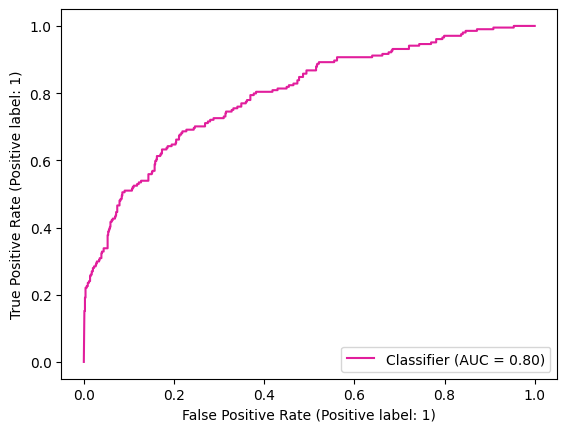

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, Nadam, Adamax
from tensorflow.keras.layers import LeakyReLU


model = Sequential()
model.add(Dense(12, input_shape=X_train.shape[1:], activation=LeakyReLU()))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=35, restore_best_weights=True,
)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=50,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
    class_weight={0: 0.6278777731268314, 1: 2.454991816693944}

)
#best model learning rate = 0.003

Epoch 1/1000
162/162 [==============================] - 4s 10ms/step - loss: 0.6209 - recall: 0.6453 - precision: 0.3314 - val_loss: 0.5661 - val_recall: 0.5569 - val_precision: 0.3605
Epoch 2/1000
162/162 [==============================] - 1s 9ms/step - loss: 0.5641 - recall: 0.6705 - precision: 0.4260 - val_loss: 0.4688 - val_recall: 0.5569 - val_precision: 0.4947
Epoch 3/1000
162/162 [==============================] - 2s 12ms/step - loss: 0.5219 - recall: 0.6795 - precision: 0.4738 - val_loss: 0.5420 - val_recall: 0.7485 - val_precision: 0.3846
Epoch 4/1000
162/162 [==============================] - 3s 19ms/step - loss: 0.4987 - recall: 0.7185 - precision: 0.4771 - val_loss: 0.4195 - val_recall: 0.6826 - val_precision: 0.4978
Epoch 5/1000
162/162 [==============================] - 2s 9ms/step - loss: 0.4873 - recall: 0.7263 - precision: 0.4895 - val_loss: 0.5572 - val_recall: 0.7665 - val_precision: 0.4063
Epoch 6/1000
162/162 [==============================] - 1s 7ms/step - loss: 0

#### Monitor the "val_recall" as metric

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 2ms/step
[[715  81]
 [ 90 114]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       796
           1       0.58      0.56      0.57       204

    accuracy                           0.83      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.83      0.83      0.83      1000



## Optuna

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 17:25:48,183] A new study created in memory with name: no-name-d3b8f2e6-c948-46e7-8bfc-a5b95ad07c24
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type type.
  w

Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 17:26:00,239] Trial 0 finished with value: 0.20399999618530273 and parameters: {'n_units1': 11, 'n_units2': 38, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.03697861946827602, 'w0': 0.010016286519161083, 'w1': 1.3615482505599799}. Best is trial 0 with value: 0.20399999618530273.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 17:26:24,251] Trial 1 finished with value: 0.8489999771118164 and parameters: {'n_units1': 80, 'n_units2': 42, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.003810098713660594, 'w0': 1.4944996846874299, 'w1': 0.3396891341090045}. Best is trial 1 with value: 0.8489999771118164.
[I 2023-10-30 17:27:07,753] Trial 2 finished with value: 0.7960000038146973 and parameters: {'n_units1': 74, 'n_units2': 34, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0022158049533662714, 'w0': 0.030825574191147235, 'w1': 0.026887254149214956}. Best is trial 1 with value: 0.8489999771118164.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 17:27:19,491] Trial 3 finished with value: 0.6809999942779541 and parameters: {'n_units1': 36, 'n_units2': 12, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 4.0467978111639796e-05, 'w0': 0.010609522856684617, 'w1': 0.05422031370409115}. Best is trial 1 with value: 0.8489999771118164.


Restoring model weights from the end of the best epoch: 27.
Epoch 42: early stopping


[I 2023-10-30 17:27:39,703] Trial 4 finished with value: 0.6779999732971191 and parameters: {'n_units1': 82, 'n_units2': 127, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00018268427564618002, 'w0': 0.010607584281729964, 'w1': 0.09244990968326709}. Best is trial 1 with value: 0.8489999771118164.
[I 2023-10-30 17:28:36,675] Trial 5 finished with value: 0.8059999942779541 and parameters: {'n_units1': 104, 'n_units2': 43, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.027601514330452166, 'w0': 0.1695683023058784, 'w1': 0.23377650602430317}. Best is trial 1 with value: 0.8489999771118164.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 17:28:44,326] Trial 6 finished with value: 0.7960000038146973 and parameters: {'n_units1': 57, 'n_units2': 76, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00014286516401452724, 'w0': 0.05292849836621121, 'w1': 0.015081244627672451}. Best is trial 1 with value: 0.8489999771118164.
[I 2023-10-30 17:29:26,333] Trial 7 finished with value: 0.20399999618530273 and parameters: {'n_units1': 124, 'n_units2': 71, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.4187258390454958e-05, 'w0': 1.0112113143756838, 'w1': 1.762794594281875}. Best is trial 1 with value: 0.8489999771118164.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 17:29:32,629] Trial 8 finished with value: 0.7960000038146973 and parameters: {'n_units1': 35, 'n_units2': 33, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00013535351174287288, 'w0': 0.48454884887936955, 'w1': 0.060675809390538966}. Best is trial 1 with value: 0.8489999771118164.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-30 17:29:45,290] Trial 9 finished with value: 0.7960000038146973 and parameters: {'n_units1': 53, 'n_units2': 47, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 1.2011032392265749e-05, 'w0': 3.162457695852616, 'w1': 0.03255864260146628}. Best is trial 1 with value: 0.8489999771118164.


{'n_units1': 80,
 'n_units2': 42,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.003810098713660594,
 'w0': 1.4944996846874299,
 'w1': 0.3396891341090045}

In [ ]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 1s 26ms/step - loss: 0.5122 - recall: 0.0564 - val_loss: 0.4559 - val_recall: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4649 - recall: 0.0540 - val_loss: 0.4482 - val_recall: 0.1976
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4521 - recall: 0.1200 - val_loss: 0.4290 - val_recall: 0.2036
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4407 - recall: 0.1663 - val_loss: 0.4139 - val_recall: 0.2216
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4244 - recall: 0.2149 - val_loss: 0.4247 - val_recall: 0.0898
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4180 - recall: 0.2491 - val_loss: 0.3969 - val_recall: 0.1557
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4042 - recall: 0.2839 - val_loss: 0.4028 - val_recall: 0.4491
Epoch 8/100
16/16 [=================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[760  36]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.44      0.54       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.83      1000



# Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(12, input_shape=X_train_res.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    x=X_train_res,
    y=y_train_res,
    validation_split=0.1,
    batch_size=40,
    epochs=120,
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/120
242/242 [==============================] - 2s 4ms/step - loss: 0.5208 - recall: 0.1244 - val_loss: 1.0031 - val_recall: 0.1172
Epoch 2/120
242/242 [==============================] - 1s 3ms/step - loss: 0.4733 - recall: 0.3202 - val_loss: 1.0729 - val_recall: 0.4130
Epoch 3/120
242/242 [==============================] - 1s 3ms/step - loss: 0.4515 - recall: 0.3971 - val_loss: 0.7815 - val_recall: 0.5256
Epoch 4/120
242/242 [==============================] - 1s 3ms/step - loss: 0.4356 - recall: 0.4502 - val_loss: 0.7971 - val_recall: 0.4967
Epoch 5/120
242/242 [==============================] - 1s 4ms/step - loss: 0.4128 - recall: 0.4805 - val_loss: 0.6890 - val_recall: 0.6456
Epoch 6/120
242/242 [==============================] - 1s 5ms/step - loss: 0.3945 - recall: 0.5231 - val_loss: 1.0532 - val_recall: 0.4428
Epoch 7/120
242/242 [==============================] - 1s 4ms/step - loss: 0.3877 - recall: 0.5235 - val_loss: 0.8887 - val_recall: 0.4967
Epoch 8/120
242/242 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 12)                168       
                                                                 
 dense_68 (Dense)            (None, 118)               1534      
                                                                 
 dense_69 (Dense)            (None, 118)               14042     
                                                                 
 dense_70 (Dense)            (None, 118)               14042     
                                                                 
 dense_71 (Dense)            (None, 1)                 119       
                                                                 
Total params: 29905 (116.82 KB)
Trainable params: 29905 (116.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[710  86]
 [ 80 124]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       796
           1       0.59      0.61      0.60       204

    accuracy                           0.83      1000
   macro avg       0.74      0.75      0.75      1000
weighted avg       0.84      0.83      0.83      1000



In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.643923,0.653661,0.674927,0.712575
1,0.577461,0.708884,0.638586,0.808383
2,0.540737,0.725090,0.546043,0.802395
3,0.515983,0.728691,0.486896,0.766467
4,0.495233,0.720888,0.409970,0.610778


## Using Under-Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=0.5)
X_train_res, y_train_res = under.fit_resample(X_train, y_train)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(12, input_shape=X_train_res.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    x=X_train_res,
    y=y_train_res,
    validation_split=0.1,
    batch_size=40,
    epochs=120,
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/120
124/124 [==============================] - 3s 9ms/step - loss: 0.5172 - recall: 0.2447 - val_loss: 1.3285 - val_recall: 0.2000
Epoch 2/120
124/124 [==============================] - 1s 5ms/step - loss: 0.4880 - recall: 0.2611 - val_loss: 1.1682 - val_recall: 0.2891
Epoch 3/120
124/124 [==============================] - 1s 5ms/step - loss: 0.4660 - recall: 0.3406 - val_loss: 1.1888 - val_recall: 0.4145
Epoch 4/120
124/124 [==============================] - 1s 5ms/step - loss: 0.4512 - recall: 0.3593 - val_loss: 0.9169 - val_recall: 0.3636
Epoch 5/120
124/124 [==============================] - 0s 3ms/step - loss: 0.4355 - recall: 0.3663 - val_loss: 1.2286 - val_recall: 0.3364
Epoch 6/120
124/124 [==============================] - 0s 3ms/step - loss: 0.4209 - recall: 0.4256 - val_loss: 0.9324 - val_recall: 0.3891
Epoch 7/120
124/124 [==============================] - 0s 3ms/step - loss: 0.4117 - recall: 0.4677 - val_loss: 1.1929 - val_recall: 0.3036
Epoch 8/120
124/124 [======

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 6ms/step
[[709  87]
 [ 88 116]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       796
           1       0.57      0.57      0.57       204

    accuracy                           0.82      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.82      0.82      0.82      1000



32/32 [==============================] - 0s 2ms/step


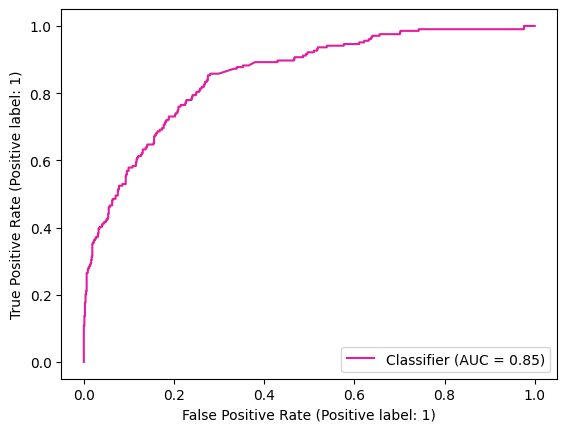

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

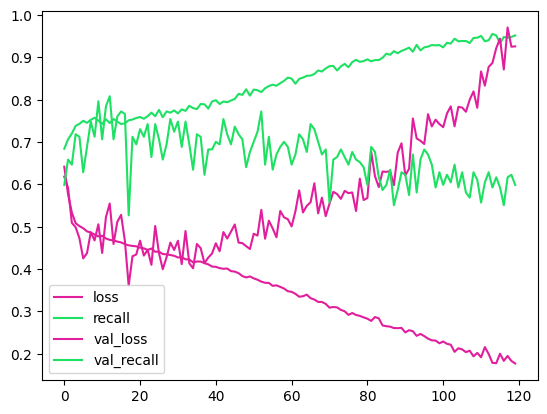

In [ ]:
loss_df.plot()
plt.show()

# Final Model and Model Deployment

I have selected this simple architecture, and moving without SMOTE or Unversamping for several reasons.
<br>


* Avoid choosing large network, as it leads to overfiting
* Got good results, without using any of the techniques
* Data is more relaiable, and closer to real-world data without using any technique
* Doesn't require more computational power



In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(12, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=120,
    verbose=1,
    class_weight={0: 0.6278777731268314, 1: 2.454991816693944}

)

Epoch 1/120
254/254 [==============================] - 6s 9ms/step - loss: 0.6295 - recall: 0.6116 - val_loss: 0.4843 - val_recall: 0.6766
Epoch 2/120
254/254 [==============================] - 1s 3ms/step - loss: 0.5374 - recall: 0.7287 - val_loss: 0.4361 - val_recall: 0.6048
Epoch 3/120
254/254 [==============================] - 1s 3ms/step - loss: 0.5170 - recall: 0.6981 - val_loss: 0.4030 - val_recall: 0.5988
Epoch 4/120
254/254 [==============================] - 1s 3ms/step - loss: 0.4958 - recall: 0.7053 - val_loss: 0.5003 - val_recall: 0.7305
Epoch 5/120
254/254 [==============================] - 1s 3ms/step - loss: 0.4900 - recall: 0.7095 - val_loss: 0.4460 - val_recall: 0.7305
Epoch 6/120
254/254 [==============================] - 1s 3ms/step - loss: 0.4862 - recall: 0.6963 - val_loss: 0.5008 - val_recall: 0.8084
Epoch 7/120
254/254 [==============================] - 1s 3ms/step - loss: 0.4841 - recall: 0.7119 - val_loss: 0.4251 - val_recall: 0.7246
Epoch 8/120
254/254 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [115]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[651 145]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       796
           1       0.51      0.75      0.61       204

    accuracy                           0.80      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.80      0.82      1000



32/32 [==============================] - 0s 2ms/step


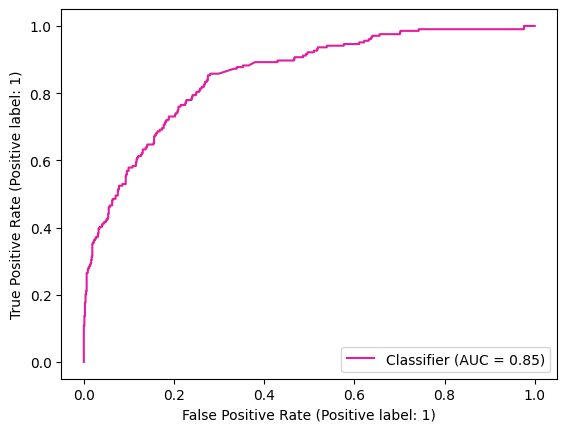

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

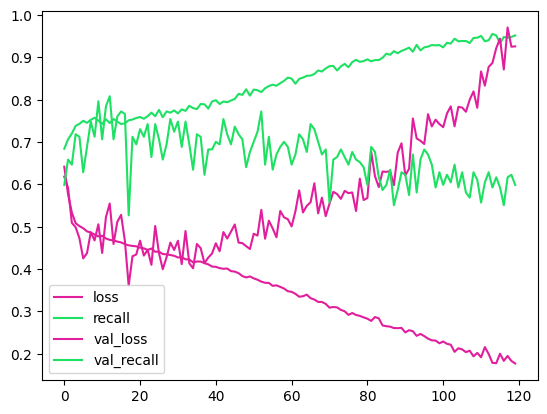

In [ ]:
loss_df.plot()
plt.show()

## Final Model

In [128]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [129]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Select the categorical columns
categorical_cols = ['Geography', 'Gender']

# Create a ColumnTransformer with one-hot encoding for categorical columns
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_cols),
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Fit and transform your data
X = column_trans.fit_transform(X)  # Replace X with your input data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [132]:
X = scaler.fit_transform(X)

In [133]:
X

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.56270874],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.46442905],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19091423]])

In [134]:
model = Sequential()
model.add(Dense(12, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate=0.008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [135]:
model.fit(
    x=X,
    y=y,
    validation_split=0.1,
    batch_size=32,
    epochs=120,
    verbose=1,
    class_weight={0: 0.6278777731268314, 1: 2.454991816693944}

)

Epoch 1/120
282/282 [==============================] - 2s 4ms/step - loss: 0.6314 - recall: 0.6039 - val_loss: 0.7104 - val_recall: 0.6760
Epoch 2/120
282/282 [==============================] - 1s 3ms/step - loss: 0.5467 - recall: 0.7438 - val_loss: 0.5748 - val_recall: 0.8045
Epoch 3/120
282/282 [==============================] - 1s 3ms/step - loss: 0.5098 - recall: 0.7616 - val_loss: 0.5199 - val_recall: 0.7207
Epoch 4/120
282/282 [==============================] - 2s 7ms/step - loss: 0.4983 - recall: 0.7696 - val_loss: 0.5931 - val_recall: 0.7933
Epoch 5/120
282/282 [==============================] - 2s 8ms/step - loss: 0.4914 - recall: 0.7756 - val_loss: 0.5160 - val_recall: 0.7318
Epoch 6/120
282/282 [==============================] - 3s 11ms/step - loss: 0.4879 - recall: 0.7546 - val_loss: 0.4786 - val_recall: 0.6983
Epoch 7/120
282/282 [==============================] - 3s 12ms/step - loss: 0.4857 - recall: 0.7433 - val_loss: 0.4499 - val_recall: 0.6480
Epoch 8/120
282/282 [====

In [136]:
X_test.shape

(1000, 13)

## Prediction

In [137]:

new_data = np.array([[700,  # CreditScore
                      1, 0, 0,  # Geography (OneHotEnc: [France, Spain, Germany])
                      0, 1,  # Gender (OneHotEnc: [Male, Female])
                      40,  # Age
                      3,  # Tenure
                      60000.0,  # Balance
                      1,  # NumOfProducts
                      0,  # HasCrCard
                      1,  # IsActiveMember
                      70000.0]])  # EstimatedSalary

new_data = scaler.transform(new_data)

# Use the model to make a prediction
prediction = model.predict(new_data)

binary_prediction = (prediction > 0.5).astype("int32")

1/1 [==============================] - 0s 71ms/step


In [138]:
binary_prediction

array([[0]], dtype=int32)

Good, our customer will not churn 🙂

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___